# ENGSCI 712 HAR Assignment

## Introduction

This experiment aims to classify walking and running activites by extracting features from time-series data, and fitting a Random Forest Classifier to these features. 

## Experiment 
The linear acceleration in the x, y and z directions and the total acceleration of the subject was recorded using the 'Physics Toolbox' app on an iPhone 15 Pro. 

The experiment was conducted over 6 different speeds on a treadmill which were labelled as walking or running: 
- Walking: 2 km/h, 3 km/h, 4 km/h.
- Running: 8 km/h, 10 km/h, 12 km/h.

Each sample was conducted over approximately 3 minutes, where the iPhone was placed in the right hand of the subject.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline

## Loading of Raw Data

In [11]:
two_kmph_df = pd.read_csv('../data/raw/acceleration-2kmph-walking.csv', index_col='time')
three_kmph_df = pd.read_csv('../data/raw/acceleration-3kmph-walking.csv', index_col='time')
four_kmph_df = pd.read_csv('../data/raw/acceleration-4kmph-walking.csv', index_col='time')
eight_kmph_df = pd.read_csv('../data/raw/acceleration-8kmph-running.csv', index_col='time')
ten_kmph_df = pd.read_csv('../data/raw/acceleration-10kmph-running.csv', index_col='time')
twelve_kmph_df = pd.read_csv('../data/raw/acceleration-12kmph-running.csv', index_col='time')


In [12]:
two_kmph_df.head()

,ax,ay,az,atotal
time,,,,
0.00,0.22,-0.54,0.48,0.75
0.01,-0.07,-0.72,0.23,0.76
0.02,-0.46,-0.75,-0.32,0.94
0.03,-0.77,-0.61,-0.47,1.09
0.04,-0.79,-0.44,-0.36,0.97


## Visualisation of Raw Data

### Comparison of acceleration in the x-direction

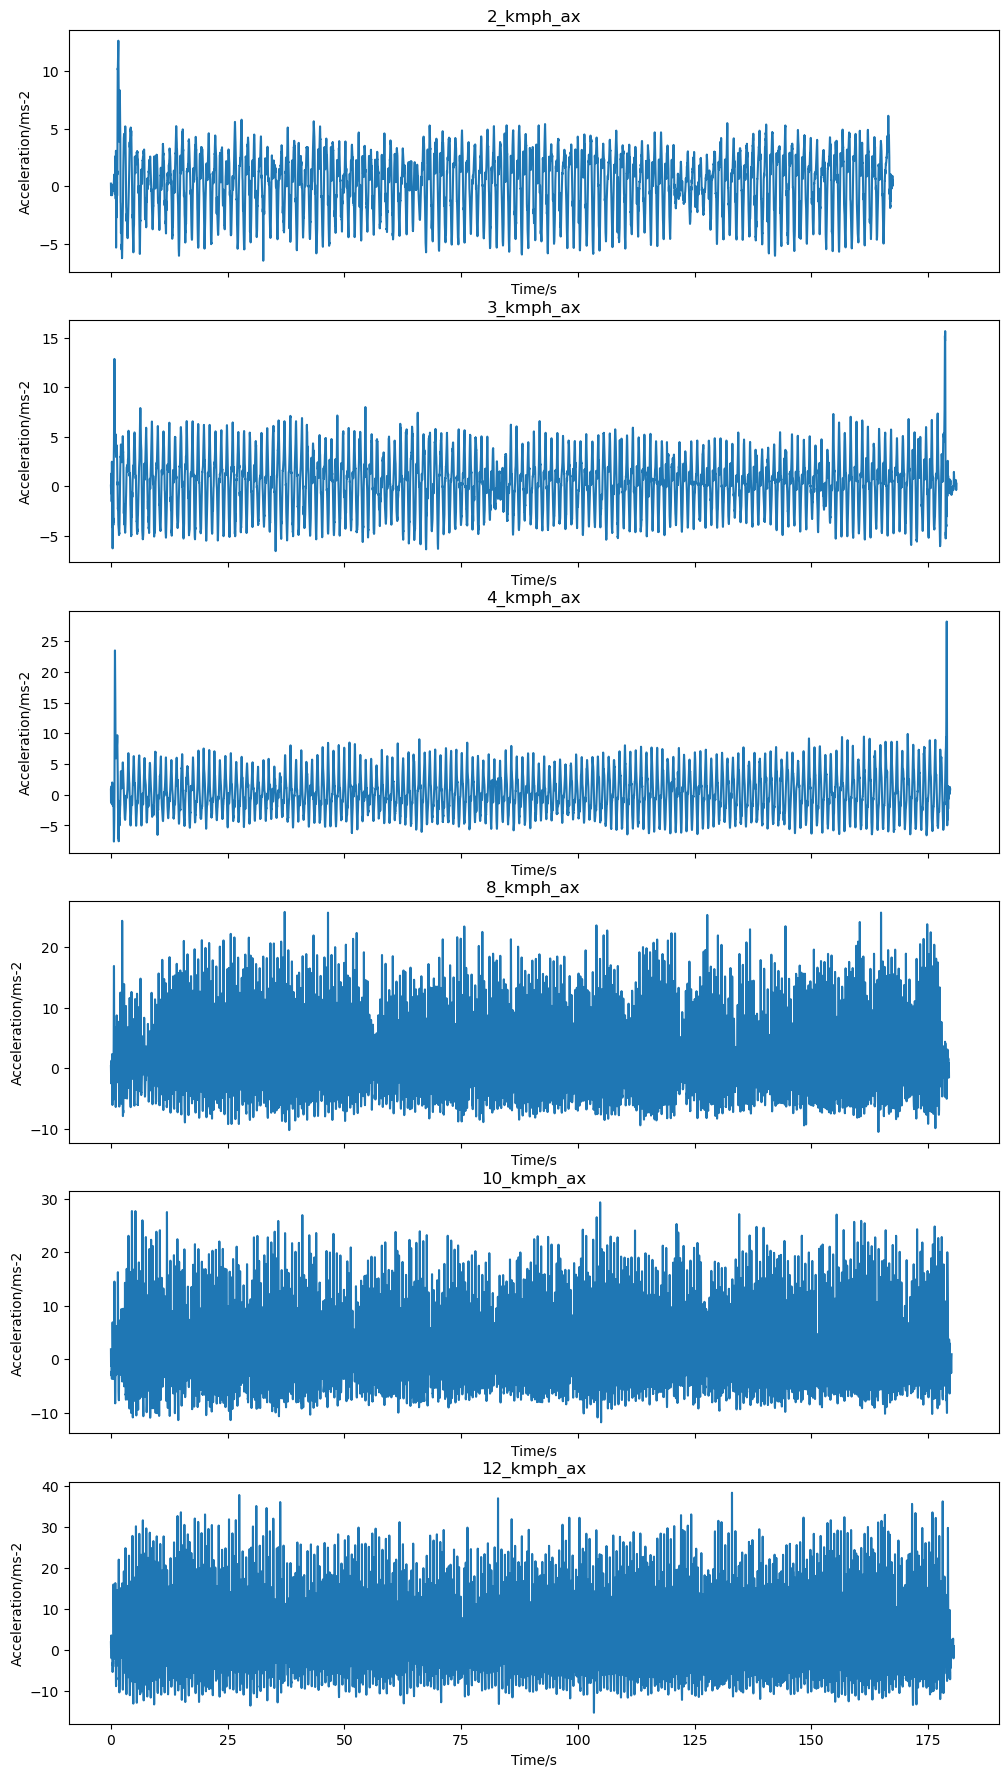

In [57]:
all_speeds = [two_kmph_df, three_kmph_df, four_kmph_df, eight_kmph_df, ten_kmph_df, twelve_kmph_df] # List of all samples.
all_names = ['2_kmph', '3_kmph', '4_kmph', '8_kmph', '10_kmph', '12_kmph']
column_labels = two_kmph_df.columns

fig_ax, ax_x = plt.subplots(6, sharex=True)
fig_ax.set_figwidth(12)
fig_ax.set_figheight(22)

for i in range(len(ax_x)):
    ax_x[i].set_title(f'{all_names[i]}_ax')
    ax_x[i].set_xlabel('Time/s')
    ax_x[i].set_ylabel('Acceleration/ms-2')
    ax_x[i].plot(all_speeds[i].index, all_speeds[i]['ax'])

plt.show()


### Comparison of acceleration in the y-direction

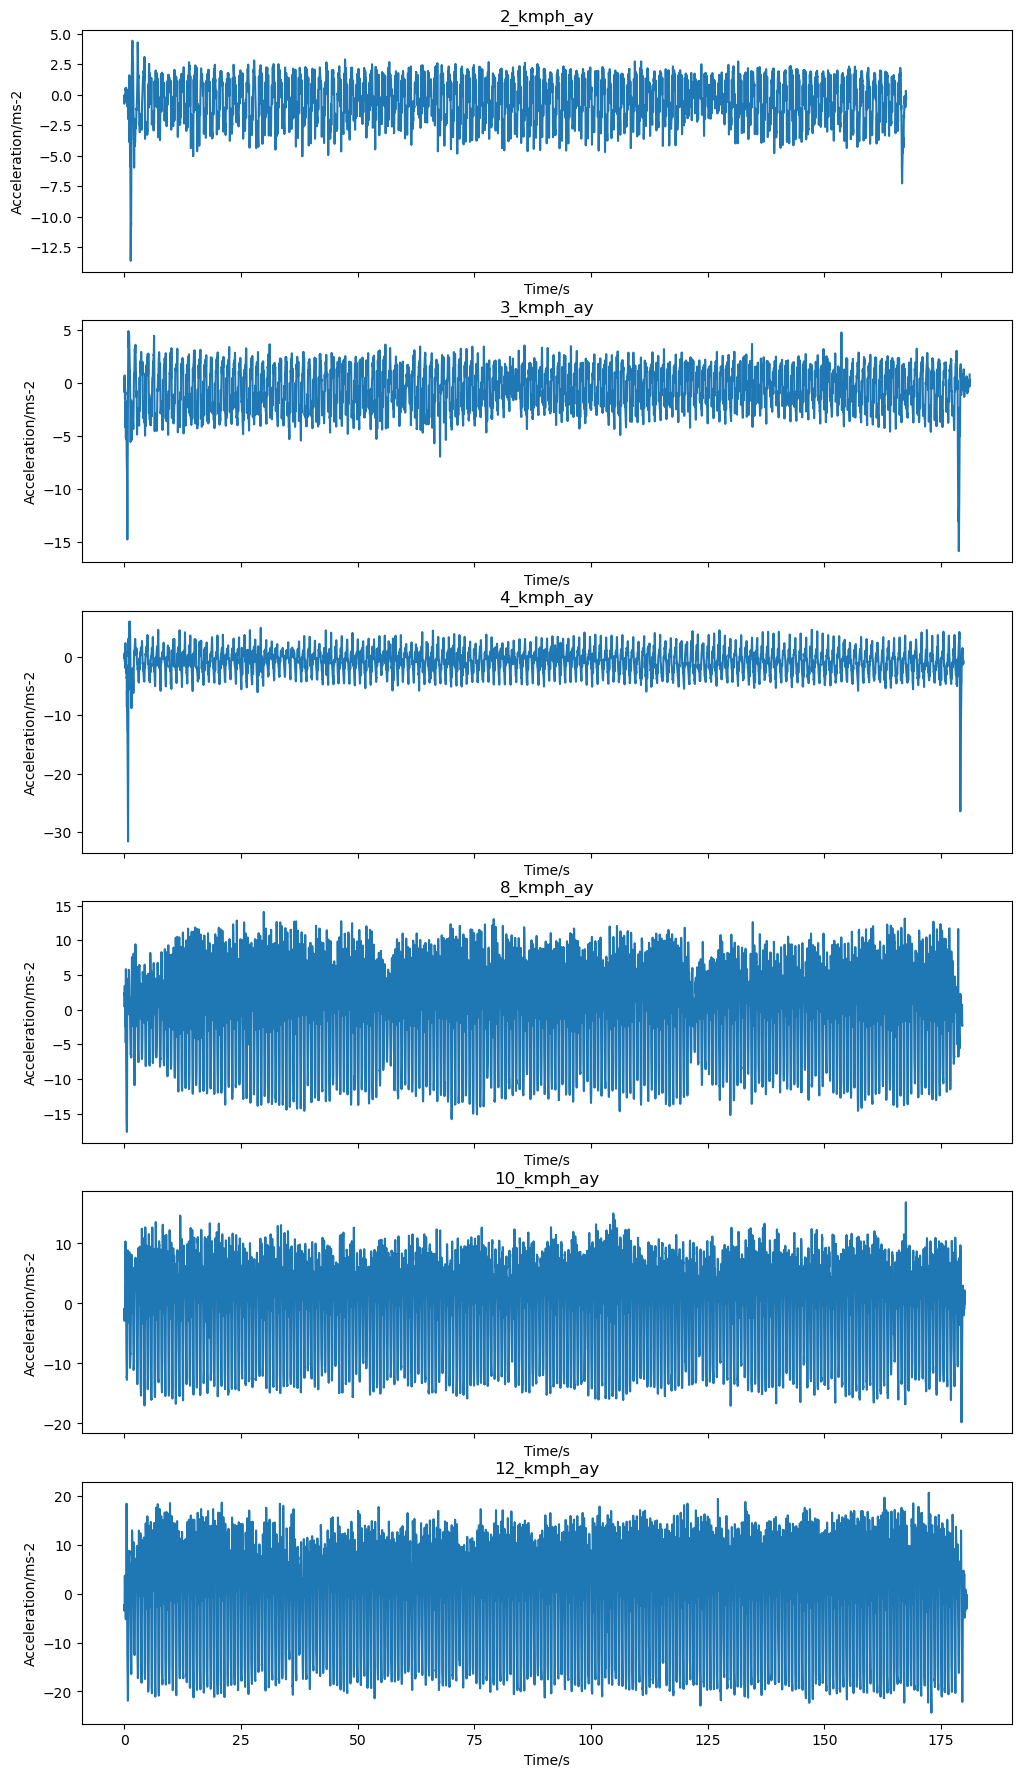

In [ ]:
fig_ay, ax_y = plt.subplots(6, sharex=True)
fig_ay.set_figwidth(12)
fig_ay.set_figheight(22)

for i in range(len(ax_y)):
    ax_y[i].set_title(f'{all_names[i]}_ay')
    ax_y[i].set_xlabel('Time/s')
    ax_y[i].set_ylabel('Acceleration/ms-2')
    ax_y[i].plot(all_speeds[i].index, all_speeds[i]['ay'])

plt.show()

### Comparison of acceleration in the z-direction

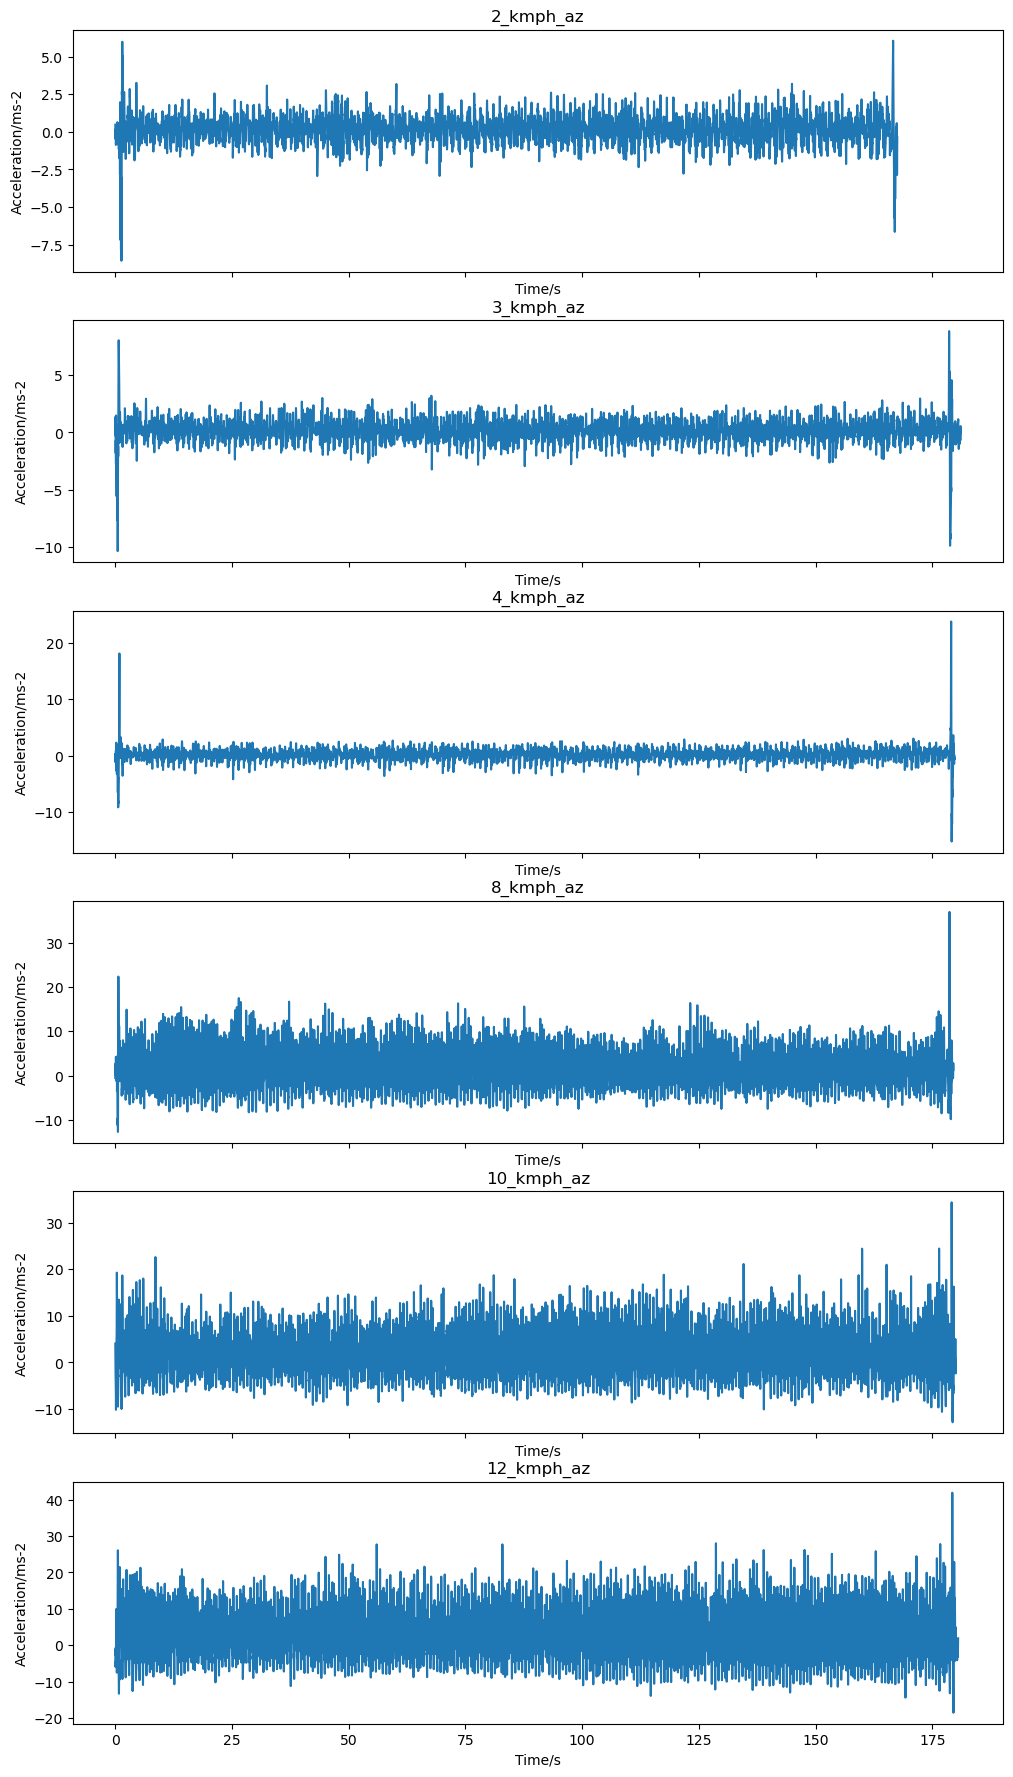

In [59]:
fig_az, ax_z = plt.subplots(6, sharex=True)
fig_az.set_figwidth(12)
fig_az.set_figheight(22)

for i in range(len(ax_z)):
    ax_z[i].set_title(f'{all_names[i]}_az')
    ax_z[i].set_xlabel('Time/s')
    ax_z[i].set_ylabel('Acceleration/ms-2')
    ax_z[i].plot(all_speeds[i].index, all_speeds[i]['az'])

plt.show()

### Comparison of total acceleration

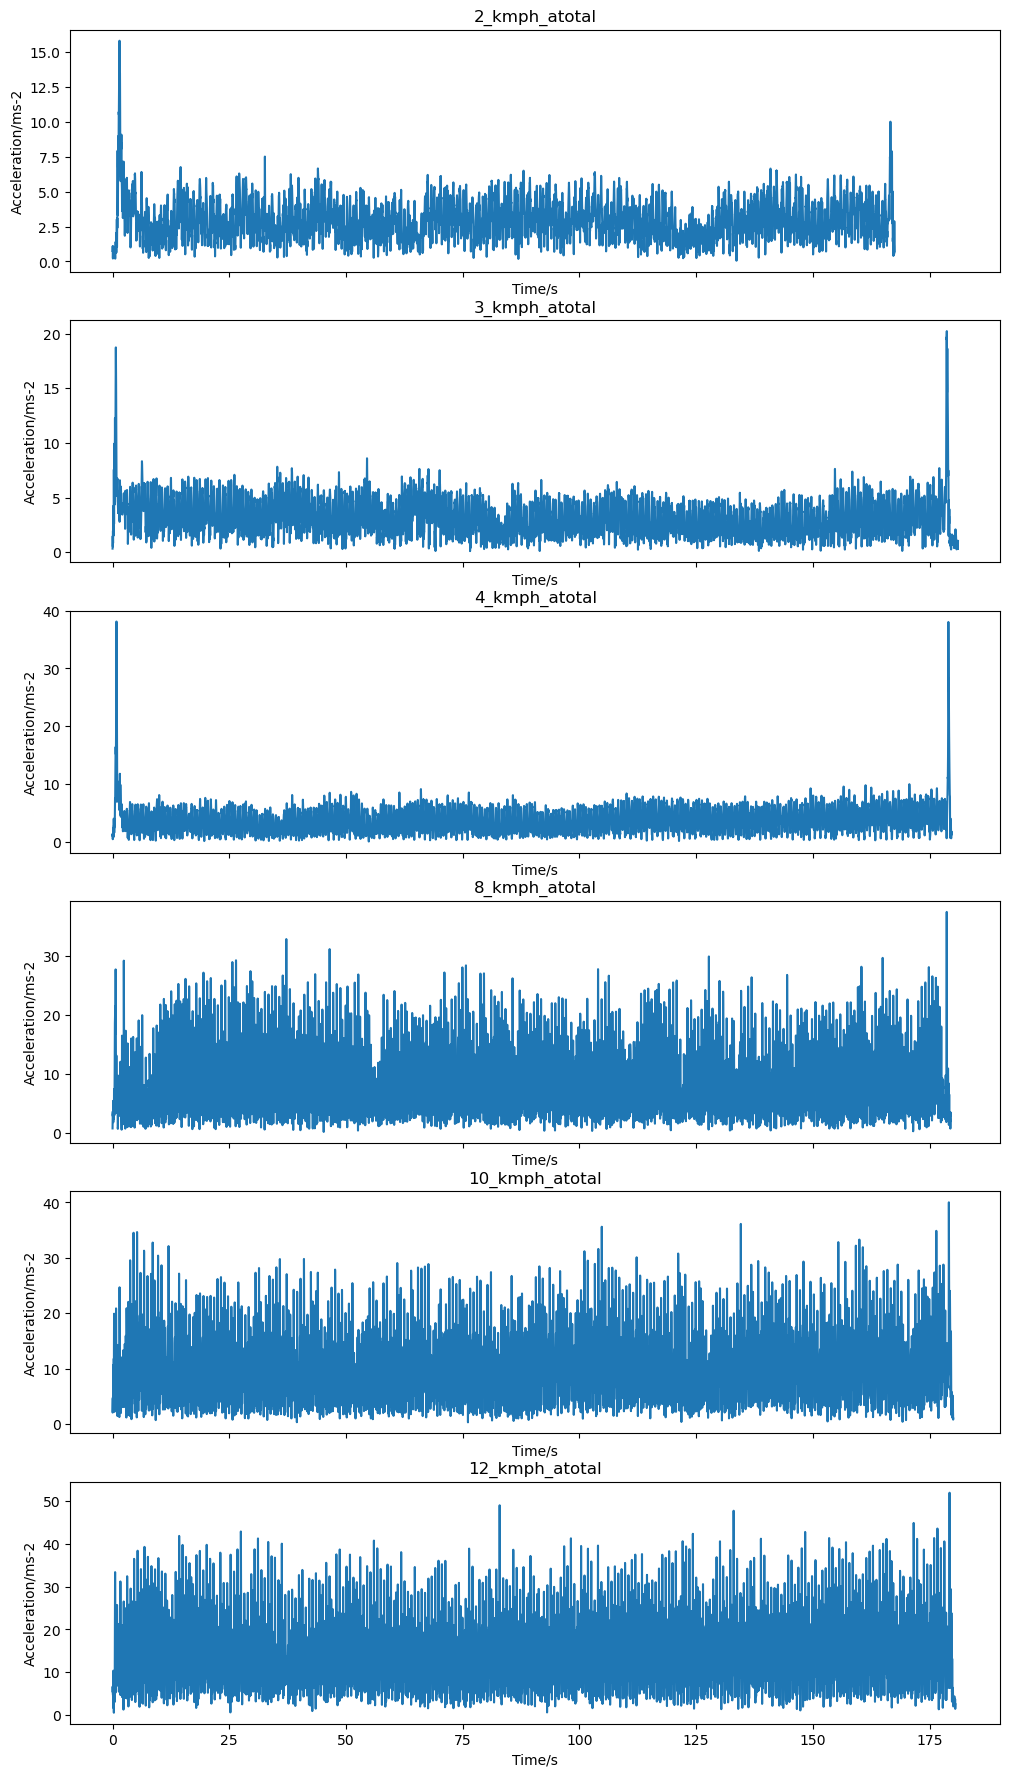

In [60]:
fig_atotal, ax_total = plt.subplots(6, sharex=True)
fig_atotal.set_figwidth(12)
fig_atotal.set_figheight(22)

for i in range(len(ax_total)):
    ax_total[i].set_title(f'{all_names[i]}_atotal')
    ax_total[i].set_xlabel('Time/s')
    ax_total[i].set_ylabel('Acceleration/ms-2')
    ax_total[i].plot(all_speeds[i].index, all_speeds[i]['atotal'])

plt.show()

### Observations
There is a general increase in the amplitude and frequency of the signals as the speed of the activity increases. This is expected because a faster walk/run would result in a faster motion of the arms.

The beginning and end of the samples can be defined by the sudden increases in amplitude at the beginning and end of the signals, particularly in the z-direction. The subject made a sudden movement in the z-direction once the walk/run was complete. This was done intentionally to ensure that the beginning and end of the samples could be clearly defined.

## Preprocessing

### Removal of transition periods

In [84]:
pd.set_option('display.max_rows', 1000)
two_kmph_df['az'].head(500) # Sample starts at index=1.629

time
0.000    0.48
0.010    0.23
0.020   -0.32
0.030   -0.47
0.040   -0.36
0.050   -0.10
0.060    0.16
0.070    0.09
0.080   -0.15
0.090   -0.28
0.100   -0.51
0.110   -0.75
0.120   -0.87
0.130   -0.87
0.140   -0.68
0.150   -0.40
0.160   -0.10
0.170    0.18
0.180    0.28
0.190    0.23
0.200    0.14
0.210   -0.02
0.220   -0.21
0.230   -0.28
0.240   -0.34
0.250   -0.36
0.260   -0.28
0.270   -0.27
0.280   -0.32
0.290   -0.37
0.300   -0.39
0.310   -0.24
0.320   -0.03
0.330    0.09
0.340    0.03
0.351   -0.05
0.360   -0.26
0.370   -0.43
0.380   -0.31
0.390   -0.05
0.400    0.29
0.410    0.57
0.420    0.64
0.430    0.64
0.440    0.53
0.450    0.45
0.460    0.45
0.470    0.40
0.480    0.40
0.490    0.52
0.500    0.60
0.510    0.49
0.520    0.29
0.530   -0.00
0.540   -0.21
0.550   -0.25
0.560   -0.11
0.570    0.10
0.580    0.28
0.590    0.38
0.600    0.44
0.610    0.40
0.620    0.27
0.630    0.07
0.640   -0.22
0.650   -0.62
0.660   -0.86
0.669   -0.84
0.680   -0.75
0.690   -0.46
0.700   -0.10
0

In [ ]:
two_kmph_df['az'].tail(1000) # Sample ends at index=166.494

time
157.508    1.15
157.517    1.30
157.527    1.19
157.537    0.92
157.547    0.64
157.557    0.41
157.567    0.22
157.577    0.10
157.587    0.06
157.597    0.17
157.607    0.32
157.617    0.46
157.627    0.57
157.637    0.54
157.647    0.39
157.657    0.23
157.667    0.08
157.677   -0.13
157.687   -0.32
157.697   -0.50
157.707   -0.49
157.717   -0.29
157.727    0.02
157.737    0.23
157.748    0.53
157.757    0.79
157.767    0.79
157.777    0.88
157.787    0.92
157.797    0.85
157.807    0.74
157.817    0.52
157.827    0.25
157.837   -0.05
157.847   -0.35
157.857   -0.64
157.867   -0.88
157.877   -1.03
157.887   -1.01
157.897   -0.93
157.907   -0.91
157.917   -0.77
157.927   -0.55
157.937   -0.20
157.947    0.02
157.957    0.07
157.967    0.12
157.977    0.10
157.987   -0.01
157.997   -0.18
158.007   -0.31
158.017   -0.40
158.027   -0.51
158.037   -0.59
158.047   -0.67
158.057   -0.77
158.067   -0.81
158.077   -0.69
158.087   -0.66
158.097   -0.63
158.107   -0.67
158.117   -0.76
158

In [ ]:
three_kmph_df['az'].head(500) # Sample starts at index=0.880

time
0.000    -0.25
0.010    -0.21
0.020     0.12
0.030     0.75
0.040     1.37
0.050     1.26
0.060     0.21
0.070    -0.07
0.080    -0.90
0.090    -1.81
0.100    -0.76
0.110    -0.70
0.120    -1.33
0.130    -2.00
0.140    -2.73
0.150    -1.67
0.160     1.48
0.170     0.99
0.180    -0.29
0.190    -1.66
0.200    -3.75
0.210    -2.91
0.220    -1.33
0.230    -1.14
0.240    -1.23
0.250    -0.95
0.260    -2.23
0.270    -5.13
0.280    -5.56
0.290    -3.59
0.300    -1.51
0.310    -0.61
0.320    -0.75
0.330    -1.44
0.340    -2.41
0.350    -3.40
0.360    -5.01
0.370    -6.16
0.380    -7.05
0.390    -7.63
0.400    -7.05
0.410    -5.35
0.420    -2.72
0.430    -0.75
0.440     0.32
0.450     0.50
0.460    -1.10
0.470    -3.53
0.480    -6.04
0.490    -8.33
0.500    -9.91
0.510   -10.34
0.520    -9.73
0.530    -8.29
0.540    -6.53
0.550    -4.42
0.560    -2.57
0.570    -1.63
0.580    -1.32
0.590    -1.24
0.600    -1.22
0.610    -1.66
0.620    -2.08
0.630    -1.74
0.640    -0.88
0.650     0.47
0.660

In [ ]:
three_kmph_df['az'].tail(500) # Sample ends at index=178.542

time
176.102    1.10
176.112    1.25
176.122    1.32
176.132    1.29
176.142    1.14
176.152    1.01
176.162    0.87
176.172    0.77
176.182    0.70
176.192    0.70
176.202    0.80
176.212    0.85
176.222    0.87
176.232    0.89
176.242    0.93
176.252    0.97
176.262    1.00
176.272    1.04
176.282    1.09
176.292    1.11
176.302    1.03
176.312    0.86
176.322    0.59
176.332    0.38
176.342    0.24
176.352    0.08
176.362   -0.02
176.372   -0.05
176.382   -0.02
176.392    0.02
176.402    0.14
176.412    0.28
176.422    0.47
176.432    0.61
176.442    0.55
176.452    0.36
176.462    0.21
176.472    0.13
176.482    0.13
176.492    0.25
176.502    0.46
176.512    0.75
176.522    1.00
176.534    1.19
176.542    1.21
176.552    1.18
176.562    1.20
176.572    1.16
176.582    1.09
176.592    0.97
176.602    0.71
176.612    0.32
176.622   -0.06
176.632   -0.47
176.642   -0.79
176.652   -0.99
176.662   -1.10
176.672   -0.97
176.682   -0.66
176.692   -0.28
176.702    0.17
176.712    0.53
176

In [ ]:
four_kmph_df['az'].head(500) # Sample starts at index=1.590

time
0.000    -0.57
0.010    -1.14
0.020    -0.73
0.030     0.02
0.040     0.39
0.050     0.12
0.060    -0.41
0.070    -0.65
0.080    -0.56
0.090    -0.74
0.100    -0.76
0.110    -0.27
0.120     0.40
0.130     1.00
0.140     0.67
0.150    -0.36
0.160    -1.20
0.170    -1.60
0.180    -0.32
0.190     1.65
0.200     2.17
0.210     2.32
0.220     1.94
0.230     0.78
0.240    -1.00
0.250    -2.52
0.260    -2.67
0.270    -1.01
0.280     0.83
0.290     1.80
0.300     1.98
0.310     0.76
0.320    -1.28
0.330    -2.87
0.340    -3.25
0.350    -2.06
0.360     0.04
0.370     1.41
0.380     1.77
0.390     1.19
0.400    -0.11
0.410    -1.46
0.420    -2.52
0.430    -2.98
0.440    -2.72
0.450    -2.52
0.460    -2.49
0.470    -2.54
0.480    -2.93
0.490    -3.82
0.500    -4.80
0.510    -5.66
0.520    -6.16
0.530    -6.39
0.540    -6.50
0.550    -6.04
0.560    -5.02
0.570    -4.40
0.580    -5.53
0.590    -3.87
0.600    -3.77
0.610    -7.29
0.620    -9.13
0.630    -8.81
0.640    -8.15
0.650    -8.03
0.660

In [ ]:
four_kmph_df['az'].tail(500) # Sample ends at index=178.856

time
174.758     0.36
174.768     0.51
174.778     0.74
174.787     0.95
174.798     1.08
174.808     1.06
174.818     0.95
174.828     0.85
174.838     0.90
174.848     1.05
174.858     1.06
174.868     0.90
174.878     0.57
174.888     0.16
174.898    -0.35
174.908    -0.87
174.918    -1.36
174.927    -1.68
174.938    -1.91
174.948    -2.00
174.958    -1.67
174.968    -1.20
174.978    -0.58
174.988     0.03
174.998     0.67
175.008     1.16
175.018     1.31
175.027     1.24
175.038     1.01
175.047     0.63
175.058     0.21
175.067    -0.14
175.077    -0.41
175.087    -0.57
175.098    -0.63
175.107    -0.68
175.118    -0.70
175.127    -0.76
175.138    -0.81
175.147    -0.75
175.157    -0.67
175.167    -0.45
175.177    -0.10
175.187     0.21
175.198     0.46
175.209     0.67
175.218     0.70
175.227     0.66
175.237     0.25
175.247    -0.35
175.257    -0.64
175.267    -0.77
175.277    -0.81
175.287    -0.76
175.298    -0.65
175.307    -0.45
175.317    -0.20
175.327     0.01
175.337  

In [ ]:
eight_kmph_df['az'].head(500) # Sample starts at index=0.710

time
0.000    -0.53
0.010    -0.35
0.020     0.09
0.030     1.17
0.040     2.70
0.050     2.47
0.060     1.36
0.070     0.41
0.080    -0.06
0.090     0.41
0.100     1.24
0.110     2.14
0.120     3.56
0.130     4.23
0.140     3.56
0.150     1.87
0.160     0.79
0.170     1.42
0.180     2.11
0.190     2.36
0.200     2.54
0.210     3.24
0.220     3.81
0.230     3.91
0.240     2.49
0.250    -0.08
0.260    -1.23
0.270    -0.47
0.280     1.23
0.290     2.94
0.300     3.96
0.310     4.31
0.320     3.83
0.330     1.86
0.340    -0.14
0.350    -2.31
0.360    -3.50
0.370    -2.91
0.380    -2.83
0.390    -2.76
0.400    -0.58
0.410     1.42
0.420     1.80
0.430     0.77
0.440    -1.47
0.450    -3.98
0.460    -6.70
0.470    -9.62
0.480   -11.14
0.490   -11.12
0.500   -10.19
0.510    -9.65
0.520    -9.76
0.530   -10.73
0.540   -11.43
0.550   -11.90
0.560   -12.69
0.570   -12.62
0.580   -11.59
0.590    -8.04
0.600    -2.71
0.610     1.43
0.620     7.04
0.630    12.26
0.640    16.50
0.650    20.12
0.660

In [ ]:
eight_kmph_df['az'].tail(500) # Sample ends at index=178.635

time
174.526     0.03
174.536    -0.24
174.546    -0.30
174.556    -0.37
174.566    -0.47
174.576    -0.92
174.586    -1.64
174.596    -2.23
174.606    -2.79
174.616    -3.63
174.626    -4.51
174.636    -5.56
174.646    -6.36
174.656    -6.69
174.666    -6.65
174.676    -6.27
174.686    -5.53
174.696    -4.86
174.706    -4.30
174.716    -3.88
174.726    -3.47
174.736    -3.12
174.746    -2.70
174.756    -1.89
174.766    -0.85
174.776    -0.14
174.786     0.14
174.796     0.64
174.806     1.84
174.817     3.47
174.826     5.18
174.836     7.08
174.846     8.49
174.856     9.06
174.866     8.75
174.876     7.47
174.886     5.89
174.896     4.40
174.906     2.92
174.916     1.61
174.926     0.43
174.936    -0.73
174.946    -1.76
174.956    -2.37
174.966    -2.67
174.976    -2.76
174.986    -2.82
174.996    -2.81
175.006    -2.82
175.016    -2.84
175.026    -2.84
175.036    -2.97
175.046    -3.07
175.056    -3.08
175.066    -2.90
175.076    -2.44
175.086    -1.73
175.096    -1.12
175.106  

In [ ]:
ten_kmph_df['az'].head(500) # Sample starts at index=0.380

time
0.000     4.05
0.010     1.67
0.020     0.20
0.030    -0.77
0.040    -1.41
0.050    -2.00
0.060    -2.00
0.070    -2.33
0.080    -3.07
0.090    -3.45
0.100    -3.72
0.110    -4.93
0.120    -6.64
0.130    -8.80
0.140   -10.16
0.150    -9.29
0.160    -6.05
0.170    -1.45
0.180     0.99
0.190     1.63
0.200     1.08
0.210     0.01
0.220     0.35
0.230     1.83
0.240     2.91
0.250     2.83
0.260     3.75
0.270     5.46
0.280     5.63
0.290     6.30
0.300     9.40
0.310    13.73
0.320    17.12
0.330    19.28
0.340    18.53
0.350    16.73
0.360    14.88
0.370    12.59
0.380    10.23
0.390     7.48
0.400     4.54
0.410     2.18
0.420     1.19
0.430     0.07
0.440    -0.79
0.450    -1.32
0.460    -2.04
0.470    -3.07
0.480    -3.93
0.490    -4.80
0.500    -5.90
0.510    -7.01
0.520    -7.95
0.530    -8.65
0.541    -9.28
0.550    -9.48
0.560    -8.70
0.570    -7.86
0.580    -7.84
0.590    -7.91
0.600    -7.68
0.610    -6.96
0.620    -5.96
0.630    -5.03
0.640    -4.12
0.650    -3.33
0.660

In [ ]:
ten_kmph_df['az'].tail(500) # Sample ends at index=179.094

time
175.075    -1.98
175.085    -2.10
175.095    -2.27
175.105    -2.21
175.115    -2.11
175.125    -1.98
175.135    -2.08
175.145    -2.08
175.155    -1.92
175.165    -1.56
175.175    -0.59
175.185     0.59
175.195     1.67
175.205     2.64
175.215     3.92
175.225     5.37
175.235     6.58
175.245     7.77
175.255     8.84
175.265     9.28
175.276     9.49
175.285     9.76
175.296    10.04
175.306     9.02
175.315     6.54
175.325     3.67
175.335     0.74
175.345    -1.56
175.355    -2.81
175.365    -3.16
175.375    -3.13
175.385    -2.96
175.395    -2.97
175.405    -2.84
175.415    -2.49
175.425    -2.48
175.435    -2.91
175.445    -3.27
175.455    -3.78
175.465    -4.21
175.475    -4.55
175.485    -5.07
175.495    -5.64
175.505    -6.34
175.515    -6.92
175.525    -7.40
175.535    -7.66
175.545    -7.63
175.555    -7.25
175.565    -6.42
175.575    -4.97
175.585    -3.25
175.595    -1.30
175.605     0.52
175.615     1.65
175.625     1.96
175.635     2.30
175.645     3.81
175.655  

In [ ]:
twelve_kmph_df['az'].head(500) # Sample starts at index=0.580

time
0.000    -4.59
0.010    -5.88
0.020    -5.82
0.030    -4.54
0.040    -3.41
0.050    -2.79
0.060    -2.01
0.070    -0.94
0.080    -0.69
0.090    -1.17
0.100    -2.46
0.110    -2.82
0.120    -1.25
0.130    -1.04
0.140    -4.91
0.150     1.60
0.160     5.82
0.170     7.53
0.180     9.85
0.190     9.92
0.200     7.60
0.210     2.97
0.220    -2.94
0.230    -5.00
0.240    -4.17
0.250    -2.84
0.260    -1.20
0.270     0.01
0.280    -0.46
0.290    -3.04
0.300    -4.97
0.310    -6.36
0.320    -7.32
0.330    -7.52
0.340    -6.67
0.350    -5.31
0.360    -4.30
0.370    -3.53
0.380    -2.63
0.390    -0.75
0.400    -0.36
0.410    -0.04
0.420     0.25
0.430     1.73
0.440     1.82
0.450     0.15
0.460     1.24
0.470     3.68
0.480     7.58
0.490    11.33
0.500    14.52
0.510    17.52
0.520    21.13
0.530    23.89
0.540    25.06
0.550    26.06
0.560    25.67
0.570    23.29
0.580    19.67
0.590    15.33
0.600    10.68
0.610     7.13
0.620     4.88
0.630     2.64
0.640     0.49
0.650    -1.45
0.660

In [ ]:
twelve_kmph_df['az'].tail(500) # Sample ends at index=179.242

time
175.543    10.61
175.553    14.24
175.563    15.48
175.573    13.79
175.583    10.63
175.594     8.48
175.603     7.69
175.613     6.27
175.623     3.13
175.633     0.25
175.643    -1.34
175.653    -1.57
175.663    -0.72
175.673     0.76
175.683     2.33
175.693     3.56
175.703     4.42
175.713     4.42
175.723     3.60
175.733     2.17
175.743     0.03
175.753    -2.65
175.763    -5.62
175.773    -8.30
175.783   -10.12
175.793   -10.75
175.804   -10.37
175.813    -9.12
175.823    -7.59
175.833    -6.64
175.843    -6.05
175.853    -5.75
175.863    -5.73
175.873    -5.37
175.883    -5.01
175.893    -5.05
175.903    -4.92
175.913    -3.35
175.923    -0.43
175.933     2.69
175.943     6.42
175.953    12.29
175.963    19.25
175.973    23.88
175.983    23.55
175.993    19.33
176.003    14.61
176.013    10.64
176.023     7.31
176.033     4.89
176.043     3.20
176.053     1.88
176.063     0.28
176.073    -1.50
176.083    -3.04
176.093    -4.25
176.103    -5.13
176.113    -5.61
176.123  

In [101]:
twelve_kmph_df.index

Index([    0.0,    0.01,    0.02,    0.03,    0.04,    0.05,    0.06,    0.07,
          0.08,    0.09,
       ...
       180.441, 180.452, 180.462, 180.472, 180.481, 180.492, 180.502, 180.512,
       180.522, 180.532],
      dtype='float64', name='time', length=18060)

### Removing transition periods

In [115]:
stripped_two_kmph_df = two_kmph_df[(two_kmph_df.index >= 1.629) & (two_kmph_df.index <= 166.494)]
stripped_two_kmph_df.index -= stripped_two_kmph_df.index[0]
stripped_two_kmph_df

,ax,ay,az,atotal
time,,,,
0.000,8.46,1.69,2.74,9.05
0.010,7.55,1.88,1.62,7.95
0.020,6.91,2.23,0.72,7.29
0.030,6.43,2.68,0.10,6.96
0.040,5.84,2.96,-0.30,6.56
...,...,...,...,...
164.825,4.82,-1.04,1.53,5.17
164.835,4.89,-1.50,1.84,5.44
164.845,5.22,-2.11,1.97,5.97


In [117]:
stripped_three_kmph_df = three_kmph_df[(three_kmph_df.index >= 0.880) & (three_kmph_df.index <= 178.542)]
stripped_three_kmph_df.index -= stripped_three_kmph_df.index[0]
stripped_three_kmph_df

,ax,ay,az,atotal
time,,,,
0.000,4.10,3.34,2.50,5.85
0.010,4.29,4.09,1.73,6.18
0.020,4.37,4.65,0.98,6.45
0.030,4.46,4.88,0.11,6.61
0.040,4.33,4.84,-0.59,6.52
...,...,...,...,...
177.622,5.02,0.21,1.00,5.12
177.632,5.08,0.04,1.24,5.23
177.642,5.34,-0.71,1.61,5.62


In [116]:
stripped_four_kmph_df = four_kmph_df[(four_kmph_df.index >= 1.590) & (four_kmph_df.index <= 178.856)]
stripped_four_kmph_df.index -= stripped_four_kmph_df.index[0]
stripped_four_kmph_df

,ax,ay,az,atotal
time,,,,
0.000,-5.37,-7.04,-2.20,9.13
0.009,-4.03,-6.25,-1.15,7.52
0.020,-2.37,-5.30,0.06,5.81
0.029,-1.08,-4.49,1.06,4.74
0.040,-0.99,-4.37,1.20,4.64
...,...,...,...,...
177.226,7.05,3.15,1.12,7.80
177.236,7.09,3.13,1.33,7.86
177.247,7.18,3.07,1.55,7.96


In [118]:
stripped_eight_kmph_df = eight_kmph_df[(eight_kmph_df.index >= 0.710) & (eight_kmph_df.index <= 178.635)]
stripped_eight_kmph_df.index -= stripped_eight_kmph_df.index[0]
stripped_eight_kmph_df

,ax,ay,az,atotal
time,,,,
0.000,3.40,4.45,8.10,9.85
0.010,1.73,4.43,4.86,6.79
0.020,0.35,4.27,2.24,4.83
0.030,-0.13,3.88,0.81,3.96
0.040,0.36,3.48,0.15,3.50
...,...,...,...,...
177.885,0.17,-0.11,-1.88,1.89
177.895,-0.76,2.07,3.42,4.07
177.905,-2.55,4.68,5.79,7.87


In [119]:
stripped_ten_kmph_df = ten_kmph_df[(ten_kmph_df.index >= 0.380) & (ten_kmph_df.index <= 179.094)]
stripped_ten_kmph_df.index -= stripped_ten_kmph_df.index[0]
stripped_ten_kmph_df

,ax,ay,az,atotal
time,,,,
0.000,4.82,2.04,10.23,11.49
0.010,3.50,1.42,7.48,8.38
0.020,2.37,0.49,4.54,5.15
0.030,1.47,-0.80,2.18,2.75
0.040,1.17,-1.40,1.19,2.18
...,...,...,...,...
178.674,-8.75,-2.17,-0.78,9.04
178.684,-9.40,-0.62,-0.03,9.42
178.694,-10.02,1.27,1.31,10.18


In [112]:
stripped_twelve_kmph_df = twelve_kmph_df[(twelve_kmph_df.index >= 0.580) & (twelve_kmph_df.index <= 179.242)]
stripped_twelve_kmph_df.index -= stripped_twelve_kmph_df.index[0] # Reset index.
stripped_twelve_kmph_df

,ax,ay,az,atotal
time,,,,
0.000,11.49,5.63,19.67,23.46
0.010,9.19,3.58,15.33,18.23
0.020,7.17,2.00,10.68,13.02
0.030,5.54,0.32,7.13,9.04
0.040,3.96,-1.35,4.88,6.43
...,...,...,...,...
178.622,-6.79,2.00,0.80,7.12
178.632,-6.79,2.23,1.78,7.37
178.642,-6.68,3.70,3.64,8.46
